# 전기차 가격 예측 해커톤


### Dataset Info.

#### train.csv [파일]

- ID : 샘플별 고유 ID
- 제조사
- 모델
- 차량상태
- 배터리용량
- 구동방식
- 주행거리(km)
- 보증기간(년)
- 사고이력
- 연식(년)
- 가격(백만원)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [18]:
df = pd.read_csv('전기차 가격 예측 해커톤/train.csv')
df

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [20]:
df.isnull().sum()

ID             0
제조사            0
모델             0
차량상태           0
배터리용량       2711
구동방식           0
주행거리(km)       0
보증기간(년)        0
사고이력           0
연식(년)          0
가격(백만원)        0
dtype: int64

# 시각화


/Users/coldbrew/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  self._figure.tight_layout(*

/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  func(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  func(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  func(*args, **kwargs)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/events.py:

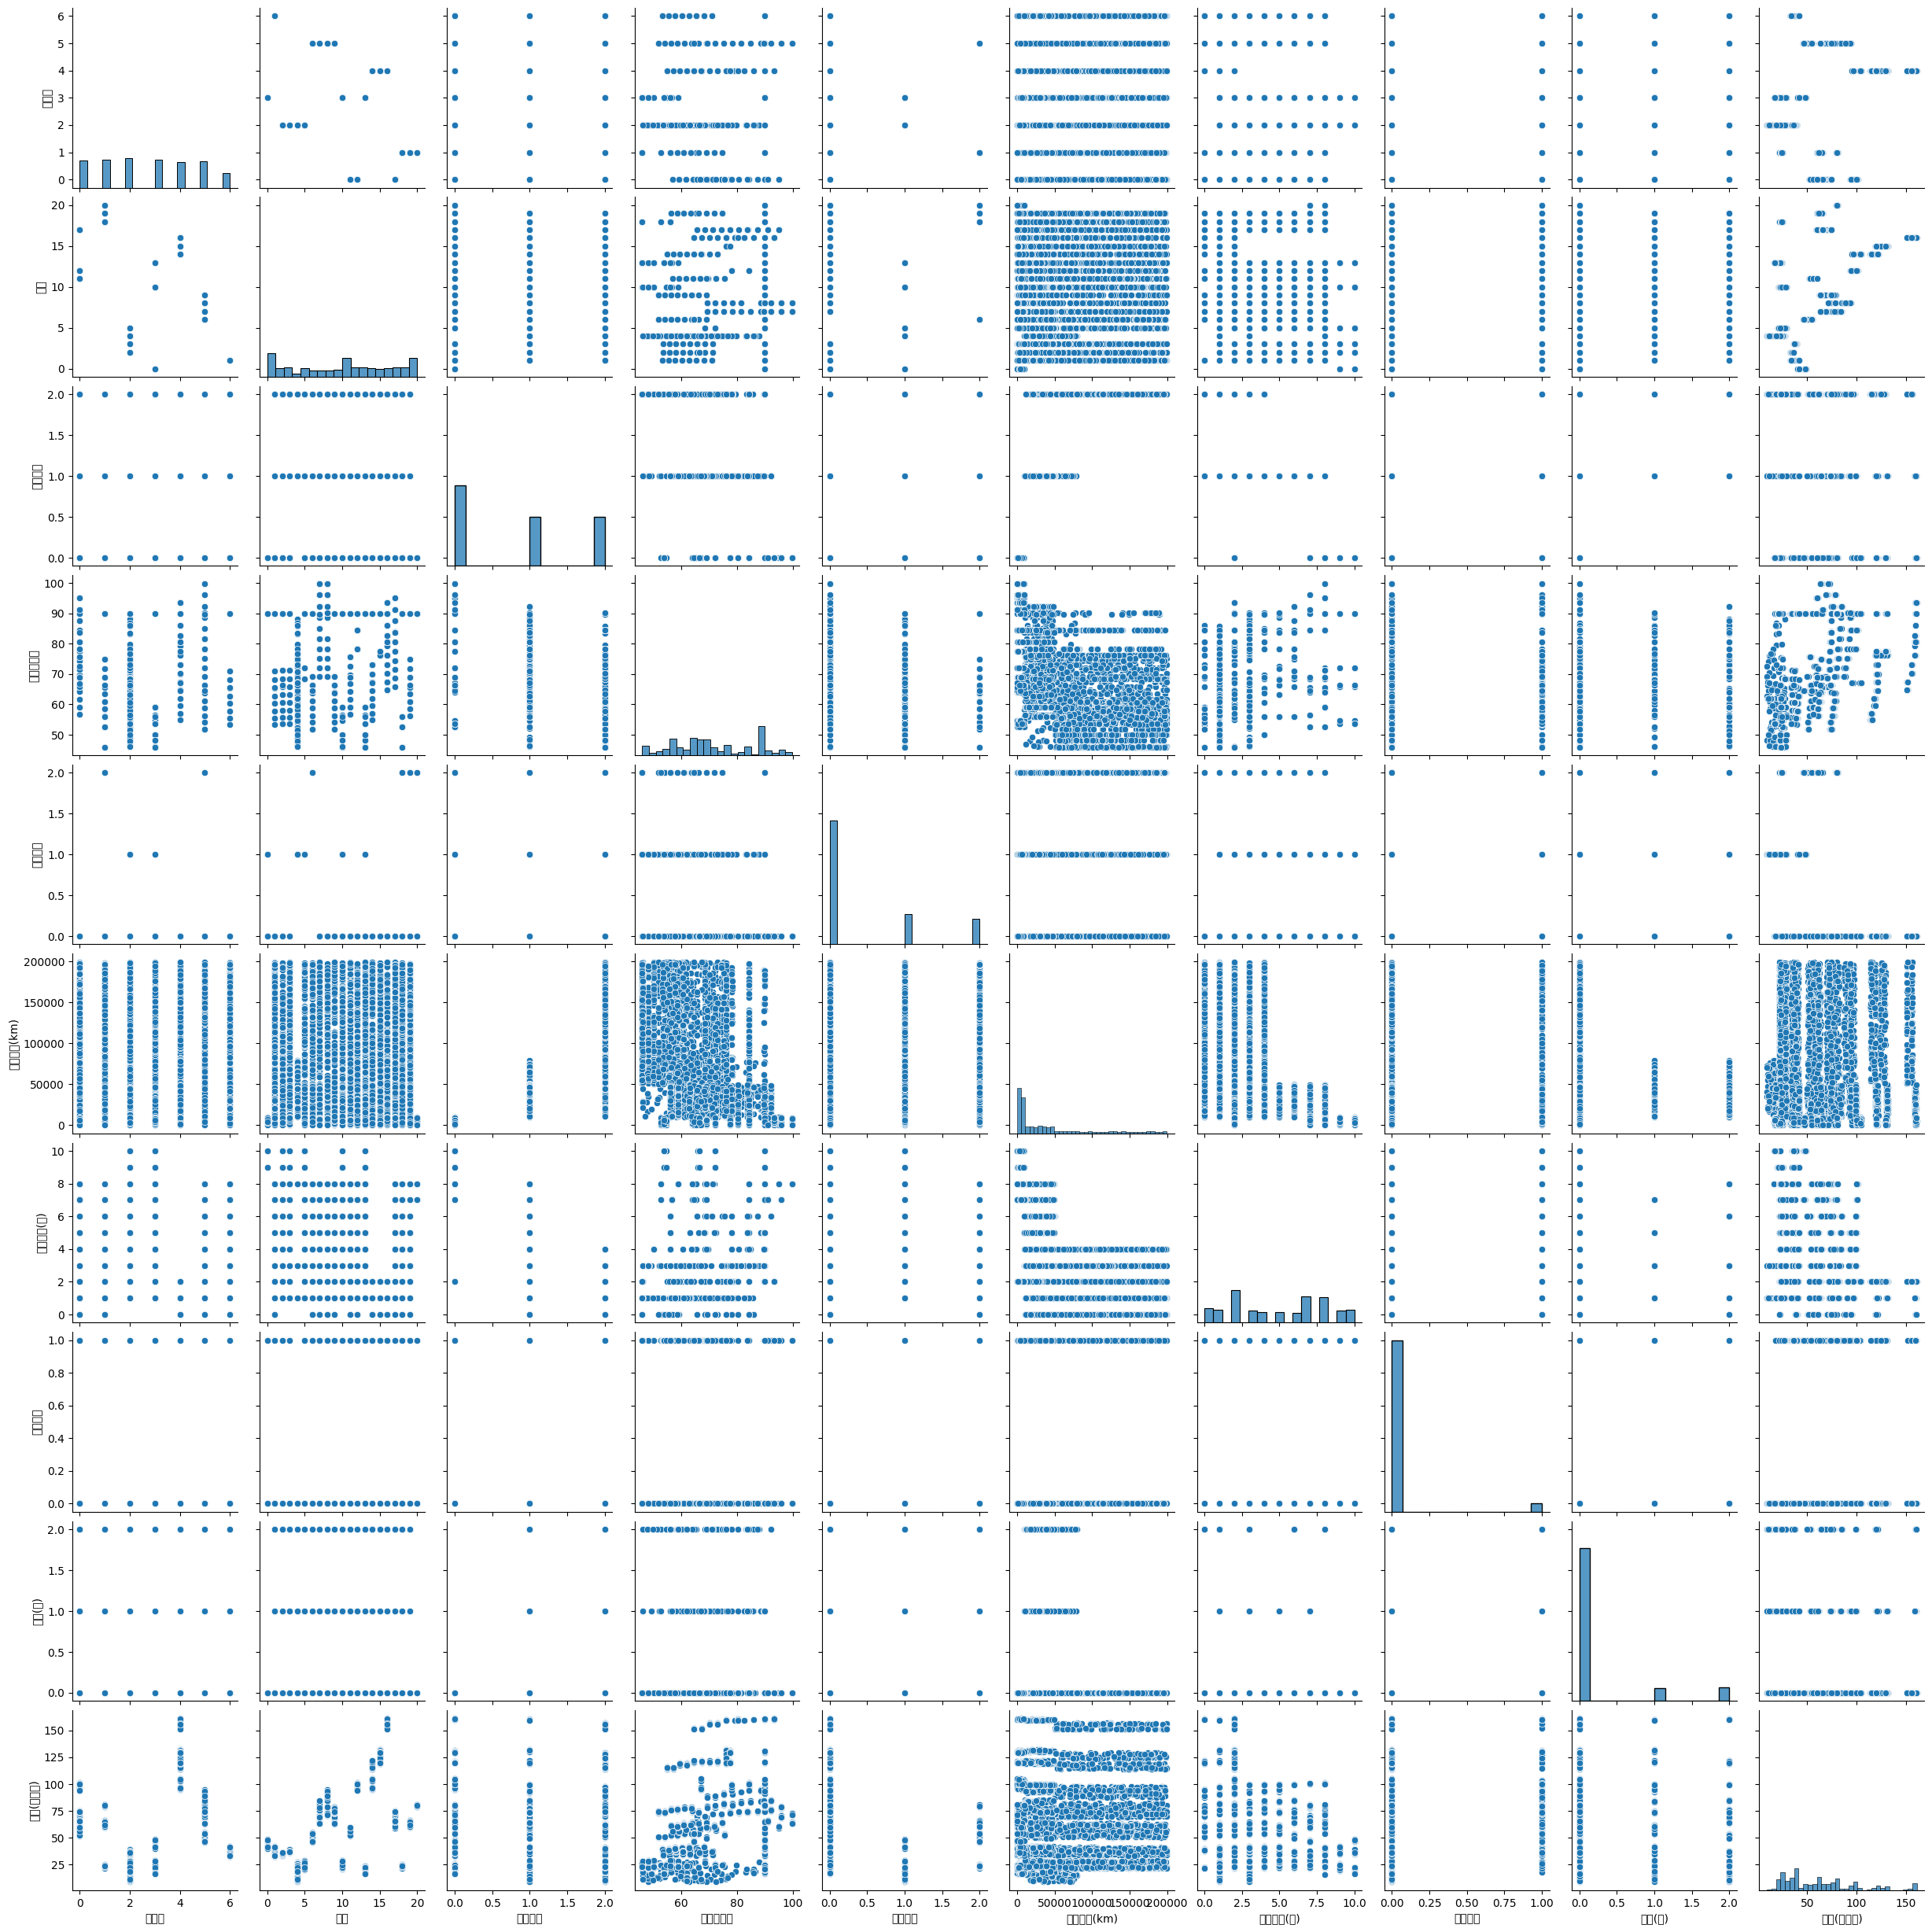

In [43]:
sns.pairplot(df)

In [22]:
battery_null_df = df[df['배터리용량'].isnull()]
battery_null_df

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
6,TRAIN_0006,T사,MS,Nearly New,NaN,AWD,19395,3,No,0,83.42
8,TRAIN_0008,T사,MY,Brand New,NaN,AWD,2226,8,No,0,74.06
9,TRAIN_0009,A사,Q4eT,Brand New,NaN,AWD,3683,7,No,0,59.66
11,TRAIN_0011,V사,ID4,Brand New,NaN,AWD,1131,8,No,0,40.50
...,...,...,...,...,...,...,...,...,...,...,...
7489,TRAIN_7489,H사,ION5,Brand New,NaN,AWD,8871,9,No,0,35.83
7490,TRAIN_7490,A사,Q4eT,Brand New,NaN,AWD,5794,7,No,0,59.95
7491,TRAIN_7491,K사,Soul,Brand New,NaN,FWD,5966,10,No,0,16.75
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95


In [23]:
# Fill null values in '배터리용량' with the mean value of the same model
df['배터리용량'] = df.groupby('모델')['배터리용량'].transform(lambda x: x.fillna(x.mean()))
df


,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077000,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200000,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,84.399252,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018000,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,66.439545,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,77.563933,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000000,RWD,39445,6,No,2,24.00


In [24]:
from sklearn.preprocessing import LabelEncoder

# df['모델'] = LabelEncoder().fit_transform(df['모델'])
# df['제조사'] = LabelEncoder().fit_transform(df['제조사'])
# df['구동방식'] = LabelEncoder().fit_transform(df['구동방식'])
# df['차량상태'] = LabelEncoder().fit_transform(df['차량상태'])
# df['사고이력'] =  LabelEncoder().fit_transform(df['사고이력'])

# LabelEncoder를 저장할 딕셔너리 생성
encoders = {}

submission_test = pd.read_csv('전기차 가격 예측 해커톤/test.csv')
submission_test

# 학습 데이터와 테스트 데이터를 동시에 처리
for col in ['모델', '제조사', '구동방식', '차량상태', '사고이력']:
    # 학습 데이터에 대해 LabelEncoder 학습 및 변환
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    
    # 테스트 데이터에 대해 동일한 LabelEncoder 변환
    submission_test[col] = encoders[col].transform(submission_test[col])

In [25]:
submission_test['배터리용량'] = submission_test.groupby('모델')['배터리용량'].transform(lambda x: x.fillna(x.mean()))
submission_test

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,4,15,1,76.093000,0,14057,2,0,0
1,TEST_001,1,20,0,90.000000,0,7547,8,0,0
2,TEST_002,1,19,0,68.286029,2,7197,7,1,0
3,TEST_003,2,2,1,68.479000,0,10357,7,0,1
4,TEST_004,3,0,0,90.000000,1,7597,10,0,0
...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,4,16,2,64.683000,0,117298,2,0,0
842,TEST_842,6,1,2,55.547000,0,72308,0,0,0
843,TEST_843,6,1,2,55.547000,0,124537,0,0,0
844,TEST_844,0,11,1,69.646000,0,15629,4,0,0


In [26]:
df['모델'].head()

0    16
1    10
2    17
3    12
4    19
Name: 모델, dtype: int64

In [27]:
df.describe()

,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
count,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,2.746965,10.109377,0.823663,71.451372,0.452581,44287.979458,4.960918,0.045752,0.222489,62.331949
std,1.885991,6.286307,0.833279,14.354042,0.728974,55204.064386,3.155342,0.208960,0.569232,36.646759
min,0.000000,0.000000,0.000000,46.000000,0.000000,3.000000,0.000000,0.000000,0.000000,9.000000
25%,1.000000,5.000000,0.000000,60.272000,0.000000,5465.000000,2.000000,0.000000,0.000000,34.390000
50%,3.000000,11.000000,1.000000,68.488000,0.000000,17331.000000,5.000000,0.000000,0.000000,56.000000
75%,4.000000,16.000000,2.000000,84.399252,1.000000,61252.000000,8.000000,0.000000,0.000000,80.050000
max,6.000000,20.000000,2.000000,99.800000,2.000000,199827.000000,10.000000,1.000000,2.000000,161.090000


In [28]:
df.isnull().sum()

ID          0
제조사         0
모델          0
차량상태        0
배터리용량       0
구동방식        0
주행거리(km)    0
보증기간(년)     0
사고이력        0
연식(년)       0
가격(백만원)     0
dtype: int64

In [29]:
df['모델'].value_counts()

모델
1     605
19    414
10    398
13    397
18    388
12    385
17    379
3     379
11    378
16    375
0     369
20    367
5     365
14    361
2     353
15    335
9     289
6     279
7     277
8     264
4     140
Name: count, dtype: int64

In [30]:
X_data = df.drop(['ID', '가격(백만원)'], axis=1)
y_data = df['가격(백만원)']

In [31]:
from sklearn.model_selection import train_test_split

# X_data_scaled = StandardScaler().fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5997, 9), (1500, 9), (5997,), (1500,))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
# lr.fit(X_train, y_train)
lr = lgbm
y_pred = lr.predict(X_test)
y_pred.shape

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 9
[LightGBM] [Info] Start training from score 62.221487


(1500,)

/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.

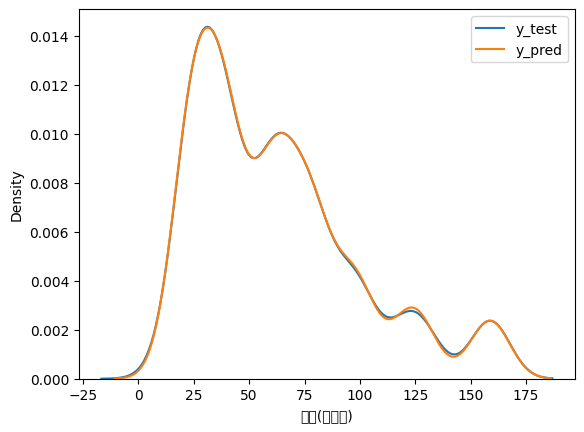

In [34]:
# y_test와 y_pred kdeplot 시각화
sns.kdeplot(y_test, label='y_test')
sns.kdeplot(y_pred, label='y_pred')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')


Mean Squared Error: 2.1773
Mean Absolute Error: 0.7634


# 테스트 데이터 가져와서 전처리하기


In [36]:
# submission_test['배터리용량'] = submission_test.groupby('모델')['배터리용량'].transform(lambda x: x.fillna(x.mean()))
submission_test

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,4,15,1,76.093000,0,14057,2,0,0
1,TEST_001,1,20,0,90.000000,0,7547,8,0,0
2,TEST_002,1,19,0,68.286029,2,7197,7,1,0
3,TEST_003,2,2,1,68.479000,0,10357,7,0,1
4,TEST_004,3,0,0,90.000000,1,7597,10,0,0
...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,4,16,2,64.683000,0,117298,2,0,0
842,TEST_842,6,1,2,55.547000,0,72308,0,0,0
843,TEST_843,6,1,2,55.547000,0,124537,0,0,0
844,TEST_844,0,11,1,69.646000,0,15629,4,0,0


In [37]:
submission_test.drop(['ID'], axis=1, inplace=True)

In [38]:
submission_test.isnull().sum()
submission_pred = lr.predict(submission_test)

In [39]:
submission_pred.shape

(846,)

In [40]:
submission_test = pd.read_csv('전기차 가격 예측 해커톤/test.csv')
submission_test

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0
...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,P사,TayGTS,Pre-Owned,64.683,AWD,117298,2,No,0
842,TEST_842,V사,ID4,Pre-Owned,55.547,AWD,72308,0,No,0
843,TEST_843,V사,ID4,Pre-Owned,55.547,AWD,124537,0,No,0
844,TEST_844,A사,Q4eT,Nearly New,69.646,AWD,15629,4,No,0


In [41]:
submission_id = submission_test[['ID']]

# ID 열과 예측값 병합
submission_result = pd.concat([submission_id, pd.Series(submission_pred, name='가격(백만원)')], axis=1)
submission_result

,ID,가격(백만원)
0,TEST_000,130.302039
1,TEST_001,80.102506
2,TEST_002,66.632472
3,TEST_003,35.148578
4,TEST_004,47.806976
...,...,...
841,TEST_841,151.467475
842,TEST_842,38.965018
843,TEST_843,38.927487
844,TEST_844,58.412297


In [42]:
submission_result.to_csv('submission2.csv', index=False)